In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [16]:
# Membaca data dari file CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hands-On/dataset.csv', sep=';')
# Menampilkan lima baris pertama dari dataset
print("Lima baris pertama dari dataset:")
print(df.head())

Lima baris pertama dari dataset:
   Overall rank Country or region  Score     X1     X2     X3     X4     X5  \
0             1           Finland  7.769  1.340  1.587  0.986  0.596  0.153   
1             2           Denmark  7.600  1.383  1.573  0.996  0.592  0.252   
2             3            Norway  7.554  1.488  1.582  1.028  0.603  0.271   
3             4           Iceland  7.494  1.380  1.624  1.026  0.591  0.354   
4             5       Netherlands  7.488  1.396  1.522  0.999  0.557  0.322   

      X6  
0  0.393  
1  0.410  
2  0.341  
3  0.118  
4  0.298  


In [17]:
# Memilih kolom yang akan digunakan untuk MLR
columns_to_use = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

In [18]:
# Memisahkan fitur dan target
X = df[columns_to_use]
y = df['Score']

In [75]:
# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [76]:
# Menampilkan dimensi data pelatihan dan pengujian
print(f"Dimensi data pelatihan: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensi data pengujian: X_test: {X_test.shape}, y_test: {y_test.shape}")

Dimensi data pelatihan: X_train: (140, 6), y_train: (140,)
Dimensi data pengujian: X_test: (16, 6), y_test: (16,)


In [77]:
# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
# Membuat model MLR
model = LinearRegression()

# Melatih model
model.fit(X_train_scaled, y_train)

# Memprediksi data pengujian
y_pred = model.predict(X_test_scaled)

In [79]:
y_pred

array([5.75209553, 5.59631269, 5.63444955, 5.89096747, 4.24556792,
       6.30756404, 5.6088425 , 5.19838979, 5.75611959, 4.7904825 ,
       6.18344404, 5.27018214, 6.98389802, 4.85104674, 6.20301686,
       6.16555845])

In [80]:
# Menghitung dan menampilkan evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.23017777189134986
Mean Absolute Error (MAE): 0.3932633619692377
R-squared (R2): 0.707720970971725


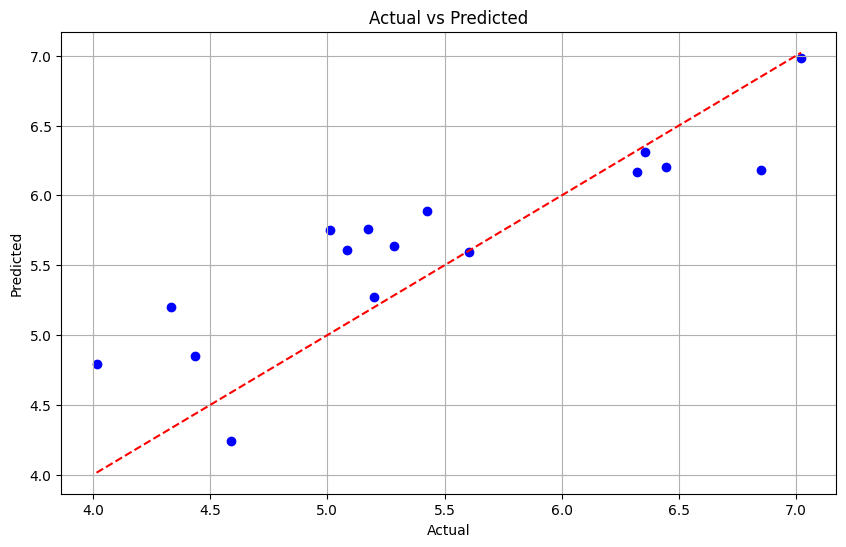

In [81]:
# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()